In [ ]:
import numpy as np
import pandas as pd


In [ ]:
# Digit-recognizer data set
df = pd.read_csv('train.csv')

In [ ]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.shape

(17210, 785)

In [ ]:
df=df.dropna()

In [ ]:
df.shape

(17209, 785)

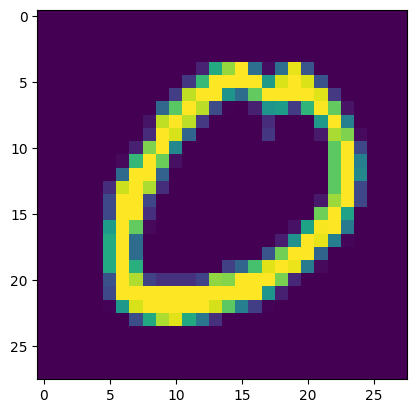

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(df.iloc[13051,1:].values.reshape(28,28))

In [ ]:
x = df.iloc[:,1:]
y = df.iloc[:,0]


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
x_train.shape

(13767, 784)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
# prediction
import time
start=time.time()
y_pred = knn.predict(x_test)
print("time is ",time.time()-start)

time is  2.8038318157196045


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score = accuracy_score(y_test,y_pred)

In [ ]:
accuracy_score

0.9535153980244044

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=200)

In [ ]:
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)

In [ ]:
x_train_trf.shape

(13767, 200)

In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_train_trf,y_train)

KNeighborsClassifier()

In [ ]:
y_pred2 = knn.predict(x_test_trf)

In [ ]:
acc_score2 = accuracy_score(y_test,y_pred2)

TypeError: 'numpy.float64' object is not callable

In [ ]:
for i in range(784):
    pca = PCA(n_components=i)
    x_train_2 = pca.fit_transform(x_train)
    x_test_2 = pca.transform(x_test)

    knn = KNeighborsClassifier()
    knn.fit(x_train_2,y_train)

    y_pred_2 = knn.predict(x_test_2)
    print(accuracy_score(y_test_2,y_pred))

ValueError: Found array with 0 feature(s) (shape=(13767, 0)) while a minimum of 1 is required by KNeighborsClassifier.

In [ ]:
pca = PCA(n_components=3)
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)

In [ ]:
import plotly.express as px

y_train_trf = y_train.astype(str)

fig = px.scatter_3d(df,x=x_train_trf[:,0],y=x_train_trf[:,1],z=x_train_trf[:,2],color=y_train_trf)

fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.show()